In [37]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 

In [38]:
diabetic_dataset=pd.read_csv("/content/diabetes.csv")


In [39]:
diabetic_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


find out any missing values in this dataset

In [58]:
diabetic_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [41]:
diabetic_dataset.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [42]:
diabetic_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Checking the Outlier is present in our dataset 

In [43]:

def outlier_pred(i):
  IQR=diabetic_dataset[i].quantile(.75)-diabetic_dataset[i].quantile(.25)
  high=diabetic_dataset[i].quantile(.75)+(1.5*IQR)
  low= diabetic_dataset[i].quantile(.25)-(1.5*IQR)
  if high > diabetic_dataset[i].max() and low< diabetic_dataset[i].min():
    z= ("outlier present in"+' '+i)
    return z
  else:
    z= ('there is no outlier present in'+' '+i)
    return z
x=diabetic_dataset.drop(columns=['Outcome','SkinThickness','Pregnancies'],axis=1)
col=x.columns.tolist()
for i in col:
  print(outlier_pred(i))

there is no outlier present in Glucose
there is no outlier present in BloodPressure
there is no outlier present in Insulin
there is no outlier present in BMI
there is no outlier present in DiabetesPedigreeFunction
there is no outlier present in Age


let's do the Scale our data 

In [44]:
scale=StandardScaler()
x=scale.fit_transform(diabetic_dataset.drop(columns=['Outcome','Pregnancies','SkinThickness'],axis=1))
y=diabetic_dataset['Outcome']


**EDA**

using pair plot

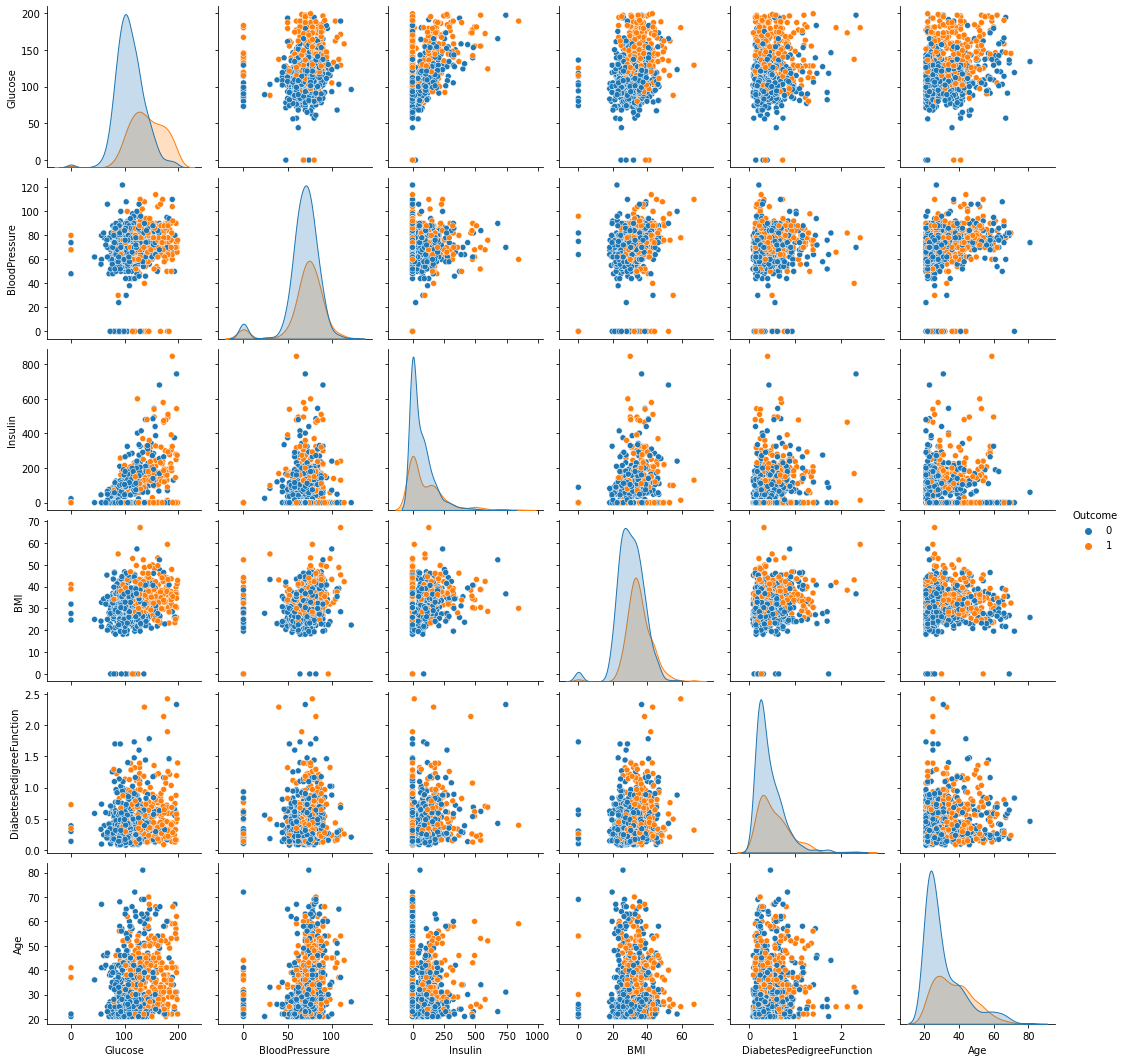

In [51]:
import seaborn as sns
new_dataset=diabetic_dataset.drop(columns=['Pregnancies','SkinThickness'],axis=1)
sns.pairplot(new_dataset,hue='Outcome')

Train Test Split

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=7)

let's do Support Vector Machine Classifier algorithm

0 ---> patient have non-diabetic

1 ---> patient have diabetic





In [53]:
#Training the model
from sklearn import svm
model=svm.SVC(kernel='linear')
model.fit(x_train,y_train)

SVC(kernel='linear')

**Model Evaluation**

Accuracy score



In [54]:
#train data accuracy prediction
x_train_pred=model.predict(x_train)
train_accuracy= accuracy_score(x_train_pred,y_train)
print("Train data accuracy is:",train_accuracy)

#test data accuracy prediction
x_test_pred=model.predict(x_test)
test_accuracy=accuracy_score(x_test_pred,y_test)
print("Test data accuracy is:",test_accuracy)

Train data accuracy is: 0.7719869706840391
Test data accuracy is: 0.8051948051948052


**Making a predictive system**

In [57]:
Glu=int(input("Enter the Glucose level:"))
BP=int(input('Enter the Blood Pressure(BP) level:'))
Insul=int(input('Enter the insulin level:'))
BMI=float(input('Give your BMI level:'))
Dia_Ped_Fun=float(input("Give a Diabetic Pedegiree Function:"))
Age=int(input("Enter Your Age:"))

input_data=(Glu,BP,Insul,BMI,Dia_Ped_Fun,Age)

#changing the input_data to numpy array
input_to_nparray=np.asarray(input_data)

#reshape the array as we are predictig for one instance
input_reshaped=input_to_nparray.reshape(1,-1)

result=model.predict(scale.transform(input_reshaped))

if result==1:
  print('sorry!,\n You Have Diabetic')
else:
  print('Congrats,\n You Not Have Diabetic')

Enter the Glucose level:35
Enter the Blood Pressure(BP) level:359
Enter the insulin level:66
Give your BMI level:36
Give a Diabetic Pedegiree Function:0.111
Enter Your Age:89
Congrats,
 You Not Have Diabetic


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
35